Shortest paths from S:
To S: 0
To A: 9
To D: 8
To E: 7
To B: 18
To C: 11


Text(0.5, 1.0, 'Shortest Paths from Source S')

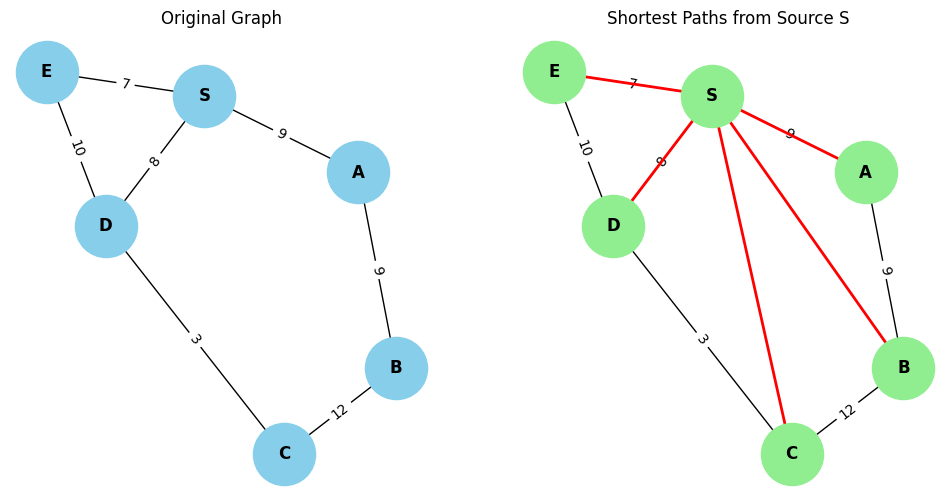

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, source):
    distances = {vertex: float('inf') for vertex in graph.nodes()}
    distances[source] = 0
    
    priority_queue = [(0, source)]  # (distance, vertex)
    
    while priority_queue:
        current_distance, current_vertex = priority_queue.pop(0)
        
        if current_distance > distances[current_vertex]:
            continue
        
        for neighbor in graph.neighbors(current_vertex):
            weight = graph[current_vertex][neighbor]['weight']
            distance = current_distance + weight  # Corrected line
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                priority_queue.append((distance, neighbor))
                priority_queue.sort()  # Re-sort the priority queue
        
    return distances

# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([('S', 'A', 9), ('S', 'D', 8), ('S', 'E', 7),
                           ('A', 'B', 9), 
                            ('B', 'C', 12), 
                            ('C', 'D', 3), ('D', 'E', 10),])

# Find shortest paths from source vertex 'A'
source_vertex = 'S'
shortest_paths = dijkstra(G, source_vertex)
print("Shortest paths from", source_vertex + ":")
for vertex, distance in shortest_paths.items():
    print("To", vertex + ":", distance)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.title('Original Graph')

# Draw the graph with shortest paths
plt.subplot(1, 2, 2)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, edgelist=[(source_vertex, vertex) for vertex in shortest_paths.keys()], width=2, edge_color='red')
plt.title('Shortest Paths from Source ' + source_vertex)
